# My First Machine Learning Project: Heart Disease Prediction
### Exploring Data, Building a Model, and Evaluating Performance


##  Exploring the Data 

In this section, we take a closer look at the dataset — its structure, missing values, feature types, and correlations. This helps us understand the data before building a model.


 # 1. Import Required Libraries
These are the core libraries needed for data loading, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



 # 2. Load and Preview the Dataset
Load your dataset and check its structure, types, and basic statistics.

In [2]:
# Load the dataset 
df = pd.read_csv("cleaned_merged_heart_dataset.csv")

# View first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column info (data types, nulls)
df.info()


Dataset shape: (1888, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [4]:
# Summary statistics for numerical features
df.describe().round(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00,1888.00
mean,54.35,0.69,1.28,131.55,246.86,0.15,0.60,149.42,0.33,1.05,1.42,0.73,2.66,0.52
std,9.08,0.46,1.28,17.56,51.61,0.36,0.64,23.01,0.47,1.16,0.62,1.02,1.25,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.75,0.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,241.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,276.00,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00,7.00,1.00



# 3. Check for Missing Values
This helps ous detect any columns with null (missing) values that may affect model training.

In [5]:
# Check missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 4. Visualize Target Class Distribution
Check how many patients have heart disease vs. those who don’t. This tells ous whether the dataset is balanced or unbalanced.

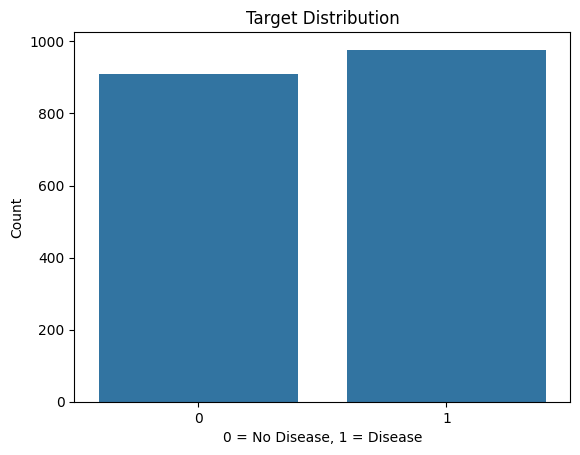

In [6]:
sns.countplot(x="target", data=df)
plt.title("Target Distribution")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()


# 5. Correlation Between Features
This heatmap shows how strongly features are related to each other and to the target.


## Correlation Matrix
The correlation matrix below shows the pairwise correlation coefficients between all numerical features in the dataset. This helps identify how strongly two variables are related:

+1 → perfect positive correlation (as one increases, so does the other)

-1 → perfect negative correlation (as one increases, the other decreases)

0 → no linear correlation

Highly correlated features (positively or negatively) can impact model performance, especially for linear models. This plot helps us detect such relationships.

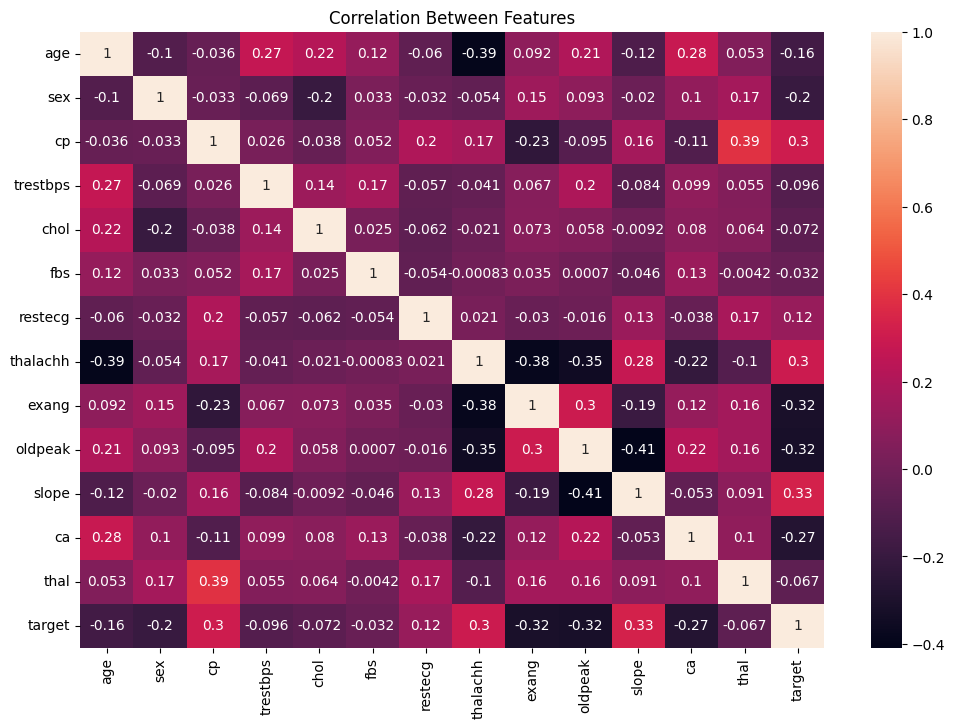

In [7]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Between Features")
plt.show()

## Building and Tuning the Heart Disease Prediction Model
* In this step, we build a machine learning model to predict the presence of heart disease using a Random Forest Classifier. The workflow includes:


* Importing essential libraries for data handling, preprocessing, and model building.


* Preparing the data by separating features (X) and the target label (y), then splitting into training and testing sets using train_test_split.


* Creating a pipeline that includes feature scaling (StandardScaler) and a random forest classifier to streamline preprocessing and modeling.


* Defining a hyperparameter grid for RandomForestClassifier and using GridSearchCV with Stratified 5-Fold Cross-Validation to search for the best-performing combination of parameters.


* Fitting the model using the training data and selecting the best model based on F1 score, which balances precision and recall — ideal for imbalanced classification problems.


* Finally, the best model is saved using pickle so it can be reused later for predictions or deployment.

In [8]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Step 2: Set Seed for Reproducibility
np.random.seed(44)

# Step 3: Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#  Step 5: Create a Pipeline
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)
# Step 6: Define Hyperparameter Grid
param_grid = {
    'randomforestclassifier__n_estimators': [100,150,150],
    'randomforestclassifier__max_depth': [8,12,16],
    'randomforestclassifier__min_samples_split': [2, 4],
    'randomforestclassifier__min_samples_leaf': [1, 2],
    'randomforestclassifier__max_features': ['sqrt'],
    'randomforestclassifier__bootstrap': [True]
}




#  Step 7: Perform Grid Search with Cross-Validation

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=44),
    verbose=2,
    n_jobs=-1,
    scoring='f1'
)


# STEP 6: Fit the model
grid_search.fit(X_train, y_train)

# STEP 7: Best model
best_model = grid_search.best_estimator_


# STEP 8: Save model
with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


## Evaluating the Model Performance

After training and selecting the best Random Forest model, we now evaluate how well it performs on the test dataset. This includes several key metrics and visual tools:

* Accuracy Score: Shows the overall percentage of correct predictions made by the model.


* Confusion Matrix: A heatmap visualization that helps us understand how many samples were correctly or incorrectly classified into each category (e.g., true positives, false negatives).


* Classification Report: Displays detailed metrics like precision, recall, F1-score, and support for both classes (No Disease and Disease). This helps assess how well the model handles class imbalances and how balanced its predictions are.


These evaluation tools are crucial for interpreting the model's strengths and weaknesses and determining whether it’s reliable enough for real-world use.

#  Import Required Libraries

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Model Accuracy

In [10]:
# Predict on test data
y_preds = best_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_preds)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 97.35%


# Confusion Matrix Visualization

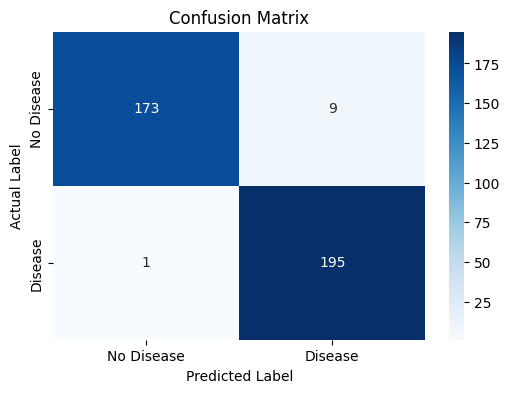

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


#  **Interpretation**:
- Top-left = True Negatives (No disease correctly predicted)
- Bottom-right = True Positives (Disease correctly predicted)
- Top-right / Bottom-left = Incorrect predictions


#  Classification Report

In [12]:
# Classification Report
report = classification_report(y_test, y_preds, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.round(2)


,precision,recall,f1-score,support
0,0.99,0.95,0.97,182.00
1,0.96,0.99,0.98,196.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.98,0.97,0.97,378.00
weighted avg,0.97,0.97,0.97,378.00


 **What Do These Metrics Mean?**

- **Precision**: Out of all predicted positives, how many were actually positive?
- **Recall**: Out of all actual positives, how many did we correctly identify?
- **F1-Score**: Harmonic mean of precision and recall (balance between them)
- **Support**: Number of actual instances for each class


# Summary
* The model achieved an accuracy of around 97% on the test set. (Note: Accuracy may slightly vary with each run due to randomness in data splitting and training.)

* The confusion matrix visualizes how well the model distinguishes between patients with and without heart disease.

* The classification report presents key metrics like precision, recall, and F1-score for each class, helping assess model performance more thoroughly.